In [9]:
import kagglehub, os, cv2, numpy as np
from skimage.transform import resize

# Download data
path = kagglehub.dataset_download("grassknoted/asl-alphabet")
data_dir = os.path.join(path, "asl_alphabet_train", "asl_alphabet_train")

# Configuration
img_size = 64
limit = 5
total = 29 * limit

def get_data(folder):
    X = np.empty((total, img_size, img_size, 3), dtype=np.float32)
    y = np.empty((total,), dtype=int)
    cnt = 0
    
    # Process folders alphabetically
    folders = sorted([f for f in os.listdir(folder) if not f.startswith('.')])
    for label, name in enumerate(folders):
        curr_path = os.path.join(folder, name)
        added = 0
        for f in os.listdir(curr_path):
            if added >= limit: break
            img = cv2.imread(os.path.join(curr_path, f))
            if img is not None:
                img = resize(img, (img_size, img_size, 3), mode='reflect')
                X[cnt] = img.astype(np.float32)
                y[cnt] = label
                cnt += 1
                added += 1
    return X, y

X_train, y_train = get_data(data_dir)
print(f"Shapes: {X_train.shape}, {y_train.shape}")

Using Colab cache for faster access to the 'asl-alphabet' dataset.
Shapes: (145, 64, 64, 3), (145,)


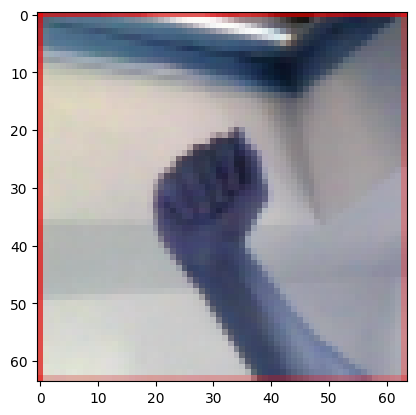

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])
plt.show()